
# Fake News Detection using Machine Learning and Python


# Reading the dataset

In [3]:
import pandas as pd # to read the dataset

true=pd.read_csv('true.csv') # loading the file into the v'ble 'true'
true.head() # prints first 5 sample data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake=pd.read_csv('fake.csv') # loading the file into the v'ble 'fake'
fake.head() # prints first 5 sample data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake["class"] = 0 # creating new column called class n labeling as '0' in fake dataset
true["class"] = 1 # creating new column called class n labeling as '1' in true dataset

In [6]:
fake.shape,true.shape  # prints no. of rows and columns 

((23481, 5), (21417, 5))

In [7]:
# Removing last 10 rows for manual testing
fake_manual_testing = fake.tail(10)
for i in range(23480,23470,-1):
    fake.drop([i], axis = 0, inplace = True)
    
    
true_manual_testing =true.tail(10)
for i in range(21416,21406,-1):
    true.drop([i], axis = 0, inplace = True)

In [8]:
fake.shape, true.shape # prints no. of rows and columns 

((23471, 5), (21407, 5))

In [9]:
fake_manual_testing["class"] = 0
true_manual_testing["class"] = 1

<ipython-input-9-10ed2d7d90fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_manual_testing["class"] = 0
<ipython-input-9-10ed2d7d90fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_manual_testing["class"] = 1


In [10]:
fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [12]:
data_manual_testing = pd.concat([fake_manual_testing,true_manual_testing], axis = 0)
data_manual_testing.to_csv("manual_testing.csv")# concating and saving to manual testing dataset

In [13]:
data= pd.concat([fake, true], axis =0 )# concating both fake and true and storing in v'ble called 'data'
data.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
data = data.sample(frac = 1) # randomly shuffling the data rows
data.head(10)

,title,text,subject,date,class
19115,TUCKER CARLSON Defends Trump On Sweden Comment...,,left-news,"Feb 20, 2017",0
6394,That Time Donald Trump Posed As His Own Spoke...,Donald Trump is pretty terrible. He s exactly ...,News,"May 13, 2016",0
12229,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,,politics,"Dec 4, 2016",0
15320,"U.N. warns if no Yemen aid access, world will ...",UNITED NATIONS (Reuters) - United Nations aid ...,worldnews,"November 8, 2017",1
11148,U.S. tightens visa waiver rules for visitors a...,WASHINGTON (Reuters) - The United States on Th...,politicsNews,"January 21, 2016",1
14551,BREAKING: TED CRUZ WINS IOWA,Is this Ted Cruz win going to harm Trump s mom...,politics,"Feb 1, 2016",0
9510,Cutting Pentagon's acquisition chief post may ...,WASHINGTON (Reuters) - A proposal by a U.S. Se...,politicsNews,"May 17, 2016",1
21159,BEHIND THE CURTAIN: How Obama Plans To Prevent...,There is nothing about Obama s executive order...,left-news,"Jan 6, 2016",0
19014,LOUDMOUTH CELEBRITIES Forced To EAT CROW After...,"On March 6, newly-minted Secretary of Housing ...",left-news,"Mar 8, 2017",0
15538,Gorbachev sees Russian democracy far off: biog...,NEW YORK (Reuters) - Former Soviet leader Mikh...,worldnews,"November 6, 2017",1


# Data exploration
# Handling missing values and null values

In [15]:
data.isnull().sum()   # to see whether any cells contain null values

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [16]:
#data.dropna()      # we can drop any null values if present with dropna() function.

In [17]:
# data.fillna('')   # we can fill null values with any value using fillna() function.

In [18]:
data.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [19]:
data.describe()

,class
count,44878.000000
mean,0.477004
std,0.499476
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [25]:
data['class'].value_counts()   # prints no. of fake and real news.

0    23471
1    21407
Name: class, dtype: int64

In [26]:
data.info()  # describes no. of rows, columns_name, range, null count, data_type.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44878 entries, 19115 to 19880
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44878 non-null  object
 1   text     44878 non-null  object
 2   subject  44878 non-null  object
 3   date     44878 non-null  object
 4   class    44878 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


C:\Users\mamat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


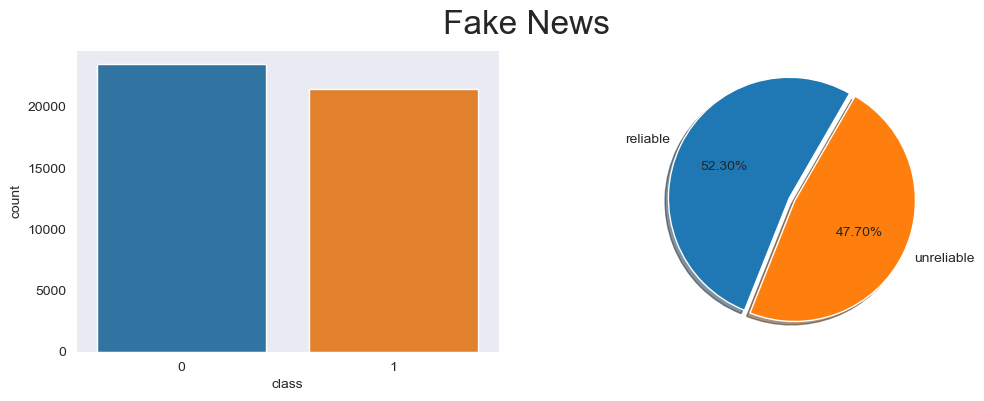

In [84]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,4), dpi=100)
sns.countplot(data['class'], ax=axes[0])
axes[1].pie(data['class'].value_counts(),
            labels=['reliable', 'unreliable'],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Fake News', fontsize=24)
plt.show()

C:\Users\mamat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


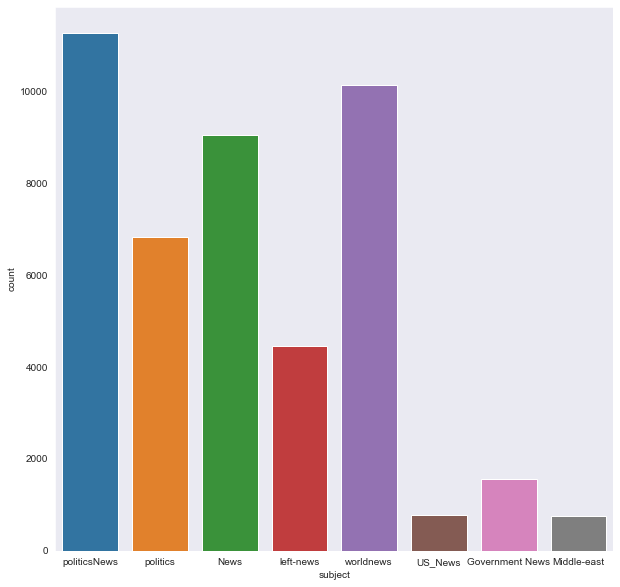

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

data['subject'].value_counts()
plt.figure(figsize = (10,10))

sns.countplot(data['subject']);

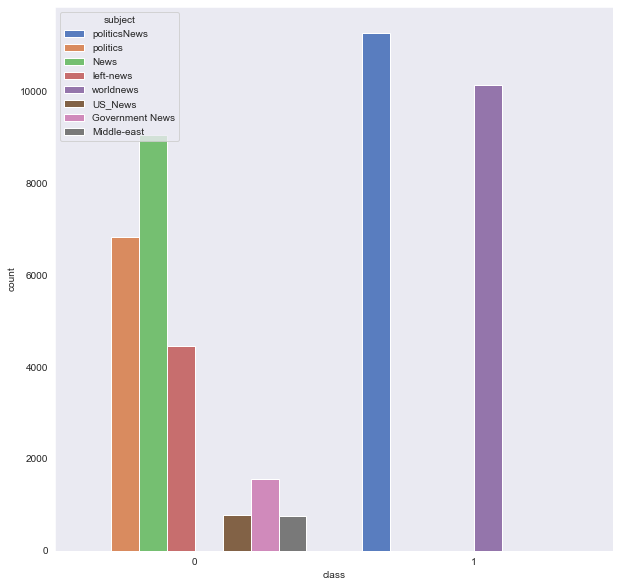

In [82]:
plt.figure(figsize = (10,10))
chart = sns.countplot(x = "class", hue = "subject" , data = data , palette = 'muted')
#chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [27]:
data.title.value_counts() # describes no. of times the same title appereed.

Factbox: Trump fills top jobs for his administration                                                     14
Factbox: Contenders for senior jobs in Trump's administration                                             8
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                          8
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead     6
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                 6
                                                                                                         ..
Ahead of debate, Trump endorsed by U.S. immigration officers                                              1
 @Ammon_Bundy’s Ridiculous Late Night Twitter Rant Has Everyone Talking (TWEETS)                          1
House will likely need to vote again on tax bill: Republican leader                                       1
 WATCH: Trump Assumes Black 

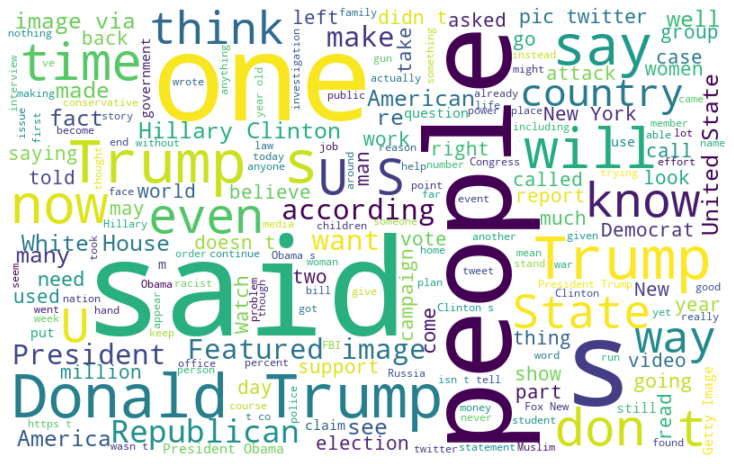

In [52]:
from wordcloud import WordCloud  # to generate word cloud of lemmatized text


fake_words = ' '.join([text for text in fake['text']])
wordcloud = WordCloud(width=800, height=500, background_color ='white',random_state=21, max_font_size=150).generate(fake_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

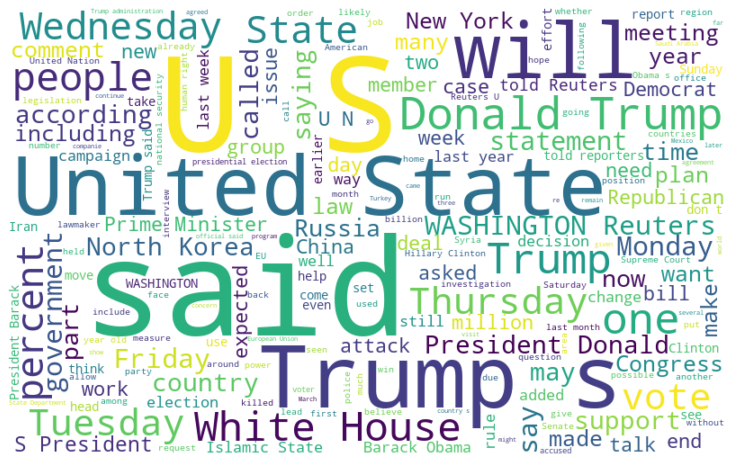

In [53]:
from wordcloud import WordCloud  # to generate word cloud of lemmatized text


fake_words = ' '.join([text for text in true['text']])
wordcloud = WordCloud(width=800, height=500, background_color ='white',random_state=21, max_font_size=150).generate(fake_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#  Data Preprocessing and cleaning
# combining title and text and storing in text column

In [35]:
data['text']=data['title'] +' '+ data['text']

In [36]:
data.head()

,title,text,subject,date,class
19115,TUCKER CARLSON Defends Trump On Sweden Comment...,TUCKER CARLSON Defends Trump On Sweden Comment...,left-news,"Feb 20, 2017",0
6394,That Time Donald Trump Posed As His Own Spoke...,That Time Donald Trump Posed As His Own Spoke...,News,"May 13, 2016",0
12229,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...,politics,"Dec 4, 2016",0
15320,"U.N. warns if no Yemen aid access, world will ...","U.N. warns if no Yemen aid access, world will ...",worldnews,"November 8, 2017",1
11148,U.S. tightens visa waiver rules for visitors a...,U.S. tightens visa waiver rules for visitors a...,politicsNews,"January 21, 2016",1


In [37]:
data['text']

19115    TUCKER CARLSON Defends Trump On Sweden Comment...
6394      That Time Donald Trump Posed As His Own Spoke...
12229    WOW! JILL STEIN’S ‘FIRESIDE CHAT’ Exposes Her ...
15320    U.N. warns if no Yemen aid access, world will ...
11148    U.S. tightens visa waiver rules for visitors a...
                               ...                        
416      Senate tax bill stalls on deficit-focused 'tri...
5657     U.S. not weighing Middle East troop hikes over...
5409      One Of The Worst Right-Wing Trolls Just Got B...
5859      Baptist Preacher: The Government Needs To Be ...
19880    Bangladesh warns Myanmar over border amid refu...
Name: text, Length: 44878, dtype: object

In [39]:
data = data.sample(frac = 1)
data.head()

,title,text,subject,date,class
888,Trump's tax cut won't be the biggest in U.S. h...,Trump's tax cut won't be the biggest in U.S. h...,politicsNews,"November 2, 2017",1
15848,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,politics,"Apr 10, 2015",0
7202,Minnesota Republican: Gay People Are Mentally...,Minnesota Republican: Gay People Are Mentally...,News,"March 30, 2016",0
11651,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,politics,"Feb 15, 2017",0
5162,Senate confirms Trump pick Perry as energy sec...,Senate confirms Trump pick Perry as energy sec...,politicsNews,"March 2, 2017",1


# Removal of punctuation, white space and convert to lower case

In [40]:
import string


def removepunctuation(text):
    p = set(string.punctuation) # p take all the punctuations, punctuations displayed below
    text=text.lower() # convert text to lower case
    words=text.split() # split the text into words
    ctext=[]
    for i in range(10): #adding numbers from 0 - 9 to p 
        p.add(str(i))
    for i in words:
        t=''.join([x for x in i.encode("ascii","ignore").decode("ascii") if x not in p]) # ignoring non ascii charecters and numbers
        ctext.append(t)
    return " ".join([i for i in ctext]) # joining the cleaned words to text
    
    
#def remove_whitespace(text):      # other way to remove white spaces.
    #return " ".join(text.split())
    

In [41]:
print(string.punctuation)

uncleaned=[i for i in data.text]
cleaned=[]
for i in uncleaned:
    try:
        ctxt=removepunctuation(i)
       #ctxt=remove_whitespace(i)
        if len(ctxt)==0: raise()
        cleaned.append(ctxt)
    except:
        cleaned.append("NAN")
data['cleaned'] = cleaned  # attaching the cleaned data as a new column to the dataset
data.to_csv (r'news.csv') # saving data in a new file in csv format


#taking the cleaned data and deleing rows that have only special symbols

data.drop(data[data["cleaned"]=="NAN"].index,axis = 0,inplace = True) # deleting rows that have no text 
data=data.reset_index(drop='true') # after deleting rows index should be reset
print(data.shape)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
(44878, 6)


In [42]:
data.head()

,title,text,subject,date,class,cleaned
0,Trump's tax cut won't be the biggest in U.S. h...,Trump's tax cut won't be the biggest in U.S. h...,politicsNews,"November 2, 2017",1,trumps tax cut wont be the biggest in us histo...
1,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,politics,"Apr 10, 2015",0,video montel williams brought to tears over tr...
2,Minnesota Republican: Gay People Are Mentally...,Minnesota Republican: Gay People Are Mentally...,News,"March 30, 2016",0,minnesota republican gay people are mentally i...
3,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,politics,"Feb 15, 2017",0,in order for trump to drain the swamp hes goin...
4,Senate confirms Trump pick Perry as energy sec...,Senate confirms Trump pick Perry as energy sec...,politicsNews,"March 2, 2017",1,senate confirms trump pick perry as energy sec...


# Remove Stopwords

In [43]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english')) # list of all stopwords in english

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mamat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [44]:
STOPWORDS=set(stopwords.words('english')) # STOPWORDS take all the stopwords displayed above

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [45]:
data["no_stopwords"]=data["cleaned"].apply(lambda text: remove_stopwords(text))
data.head(10)

,title,text,subject,date,class,cleaned,no_stopwords
0,Trump's tax cut won't be the biggest in U.S. h...,Trump's tax cut won't be the biggest in U.S. h...,politicsNews,"November 2, 2017",1,trumps tax cut wont be the biggest in us histo...,trumps tax cut wont biggest us history washing...
1,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,politics,"Apr 10, 2015",0,video montel williams brought to tears over tr...,video montel williams brought tears treatment ...
2,Minnesota Republican: Gay People Are Mentally...,Minnesota Republican: Gay People Are Mentally...,News,"March 30, 2016",0,minnesota republican gay people are mentally i...,minnesota republican gay people mentally ill n...
3,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,politics,"Feb 15, 2017",0,in order for trump to drain the swamp hes goin...,order trump drain swamp hes going take alligat...
4,Senate confirms Trump pick Perry as energy sec...,Senate confirms Trump pick Perry as energy sec...,politicsNews,"March 2, 2017",1,senate confirms trump pick perry as energy sec...,senate confirms trump pick perry energy secret...
5,House Republicans Just Introduced Bill To Sla...,House Republicans Just Introduced Bill To Sla...,News,"December 9, 2016",0,house republicans just introduced bill to slas...,house republicans introduced bill slash social...
6,Trump Administration Is Already Talking About...,Trump Administration Is Already Talking About...,News,"September 3, 2017",0,trump administration is already talking about ...,trump administration already talking withholdi...
7,CNN CANCELS POPULAR DR DREW Show After He Tell...,CNN CANCELS POPULAR DR DREW Show After He Tell...,left-news,"Aug 26, 2016",0,cnn cancels popular dr drew show after he tell...,cnn cancels popular dr drew show tells viewers...
8,U.S. appeals court voids forfeiture of Iran-li...,U.S. appeals court voids forfeiture of Iran-li...,politicsNews,"July 20, 2016",1,us appeals court voids forfeiture of iranlinke...,us appeals court voids forfeiture iranlinked n...
9,Obama asked Republican leaders to offer top co...,Obama asked Republican leaders to offer top co...,politicsNews,"March 1, 2016",1,obama asked republican leaders to offer top co...,obama asked republican leaders offer top court...


# Remove frequent words

In [46]:
from collections import Counter
cnt=Counter()
for text in data["no_stopwords"].values:
    for word in text.split():
        cnt[word]+=1
        
cnt.most_common(10)

[('said', 130205),
 ('trump', 128469),
 ('us', 68164),
 ('would', 55384),
 ('president', 52657),
 ('people', 41637),
 ('one', 36276),
 ('new', 32678),
 ('state', 32309),
 ('also', 31205)]

In [47]:
FREQWORDS=set([w for (w,wc) in cnt.most_common(10)])

def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

data["no_freqwords"]=data["no_stopwords"].apply(lambda text: remove_freqwords(text))
data.head(10)

,title,text,subject,date,class,cleaned,no_stopwords,no_freqwords
0,Trump's tax cut won't be the biggest in U.S. h...,Trump's tax cut won't be the biggest in U.S. h...,politicsNews,"November 2, 2017",1,trumps tax cut wont be the biggest in us histo...,trumps tax cut wont biggest us history washing...,trumps tax cut wont biggest history washington...
1,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,politics,"Apr 10, 2015",0,video montel williams brought to tears over tr...,video montel williams brought tears treatment ...,video montel williams brought tears treatment ...
2,Minnesota Republican: Gay People Are Mentally...,Minnesota Republican: Gay People Are Mentally...,News,"March 30, 2016",0,minnesota republican gay people are mentally i...,minnesota republican gay people mentally ill n...,minnesota republican gay mentally ill need tre...
3,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,politics,"Feb 15, 2017",0,in order for trump to drain the swamp hes goin...,order trump drain swamp hes going take alligat...,order drain swamp hes going take alligatorsand...
4,Senate confirms Trump pick Perry as energy sec...,Senate confirms Trump pick Perry as energy sec...,politicsNews,"March 2, 2017",1,senate confirms trump pick perry as energy sec...,senate confirms trump pick perry energy secret...,senate confirms pick perry energy secretary wa...
5,House Republicans Just Introduced Bill To Sla...,House Republicans Just Introduced Bill To Sla...,News,"December 9, 2016",0,house republicans just introduced bill to slas...,house republicans introduced bill slash social...,house republicans introduced bill slash social...
6,Trump Administration Is Already Talking About...,Trump Administration Is Already Talking About...,News,"September 3, 2017",0,trump administration is already talking about ...,trump administration already talking withholdi...,administration already talking withholding har...
7,CNN CANCELS POPULAR DR DREW Show After He Tell...,CNN CANCELS POPULAR DR DREW Show After He Tell...,left-news,"Aug 26, 2016",0,cnn cancels popular dr drew show after he tell...,cnn cancels popular dr drew show tells viewers...,cnn cancels popular dr drew show tells viewers...
8,U.S. appeals court voids forfeiture of Iran-li...,U.S. appeals court voids forfeiture of Iran-li...,politicsNews,"July 20, 2016",1,us appeals court voids forfeiture of iranlinke...,us appeals court voids forfeiture iranlinked n...,appeals court voids forfeiture iranlinked york...
9,Obama asked Republican leaders to offer top co...,Obama asked Republican leaders to offer top co...,politicsNews,"March 1, 2016",1,obama asked republican leaders to offer top co...,obama asked republican leaders offer top court...,obama asked republican leaders offer top court...


In [48]:
from nltk.stem.porter import PorterStemmer

stemmer=PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data["txt_stemmed"]=data["no_stopwords"].apply(lambda text: stem_words(text))
data.head(10)
        

,title,text,subject,date,class,cleaned,no_stopwords,no_freqwords,txt_stemmed
0,Trump's tax cut won't be the biggest in U.S. h...,Trump's tax cut won't be the biggest in U.S. h...,politicsNews,"November 2, 2017",1,trumps tax cut wont be the biggest in us histo...,trumps tax cut wont biggest us history washing...,trumps tax cut wont biggest history washington...,trump tax cut wont biggest us histori washingt...
1,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,politics,"Apr 10, 2015",0,video montel williams brought to tears over tr...,video montel williams brought tears treatment ...,video montel williams brought tears treatment ...,video montel william brought tear treatment us...
2,Minnesota Republican: Gay People Are Mentally...,Minnesota Republican: Gay People Are Mentally...,News,"March 30, 2016",0,minnesota republican gay people are mentally i...,minnesota republican gay people mentally ill n...,minnesota republican gay mentally ill need tre...,minnesota republican gay peopl mental ill need...
3,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,politics,"Feb 15, 2017",0,in order for trump to drain the swamp hes goin...,order trump drain swamp hes going take alligat...,order drain swamp hes going take alligatorsand...,order trump drain swamp he go take alligatorsa...
4,Senate confirms Trump pick Perry as energy sec...,Senate confirms Trump pick Perry as energy sec...,politicsNews,"March 2, 2017",1,senate confirms trump pick perry as energy sec...,senate confirms trump pick perry energy secret...,senate confirms pick perry energy secretary wa...,senat confirm trump pick perri energi secretar...
5,House Republicans Just Introduced Bill To Sla...,House Republicans Just Introduced Bill To Sla...,News,"December 9, 2016",0,house republicans just introduced bill to slas...,house republicans introduced bill slash social...,house republicans introduced bill slash social...,hous republican introduc bill slash social sec...
6,Trump Administration Is Already Talking About...,Trump Administration Is Already Talking About...,News,"September 3, 2017",0,trump administration is already talking about ...,trump administration already talking withholdi...,administration already talking withholding har...,trump administr alreadi talk withhold harvey a...
7,CNN CANCELS POPULAR DR DREW Show After He Tell...,CNN CANCELS POPULAR DR DREW Show After He Tell...,left-news,"Aug 26, 2016",0,cnn cancels popular dr drew show after he tell...,cnn cancels popular dr drew show tells viewers...,cnn cancels popular dr drew show tells viewers...,cnn cancel popular dr drew show tell viewer he...
8,U.S. appeals court voids forfeiture of Iran-li...,U.S. appeals court voids forfeiture of Iran-li...,politicsNews,"July 20, 2016",1,us appeals court voids forfeiture of iranlinke...,us appeals court voids forfeiture iranlinked n...,appeals court voids forfeiture iranlinked york...,us appeal court void forfeitur iranlink new yo...
9,Obama asked Republican leaders to offer top co...,Obama asked Republican leaders to offer top co...,politicsNews,"March 1, 2016",1,obama asked republican leaders to offer top co...,obama asked republican leaders offer top court...,obama asked republican leaders offer top court...,obama ask republican leader offer top court no...


In [49]:
nltk.download("wordnet", "nltk_data/")
from nltk.stem import WordNetLemmatizer

lemmatizer= WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["txt_lemmatized"]=data["no_stopwords"].apply(lambda text: lemmatize_words(text))
data.head(10)

[nltk_data] Downloading package wordnet to nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!


,title,text,subject,date,class,cleaned,no_stopwords,no_freqwords,txt_stemmed,txt_lemmatized
0,Trump's tax cut won't be the biggest in U.S. h...,Trump's tax cut won't be the biggest in U.S. h...,politicsNews,"November 2, 2017",1,trumps tax cut wont be the biggest in us histo...,trumps tax cut wont biggest us history washing...,trumps tax cut wont biggest history washington...,trump tax cut wont biggest us histori washingt...,trump tax cut wont biggest u history washingto...
1,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,[Video] MONTEL WILLIAMS BROUGHT TO TEARS OVER ...,politics,"Apr 10, 2015",0,video montel williams brought to tears over tr...,video montel williams brought tears treatment ...,video montel williams brought tears treatment ...,video montel william brought tear treatment us...,video montel williams brought tear treatment u...
2,Minnesota Republican: Gay People Are Mentally...,Minnesota Republican: Gay People Are Mentally...,News,"March 30, 2016",0,minnesota republican gay people are mentally i...,minnesota republican gay people mentally ill n...,minnesota republican gay mentally ill need tre...,minnesota republican gay peopl mental ill need...,minnesota republican gay people mentally ill n...
3,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,IN ORDER FOR TRUMP TO “Drain The Swamp” He’s G...,politics,"Feb 15, 2017",0,in order for trump to drain the swamp hes goin...,order trump drain swamp hes going take alligat...,order drain swamp hes going take alligatorsand...,order trump drain swamp he go take alligatorsa...,order trump drain swamp he going take alligato...
4,Senate confirms Trump pick Perry as energy sec...,Senate confirms Trump pick Perry as energy sec...,politicsNews,"March 2, 2017",1,senate confirms trump pick perry as energy sec...,senate confirms trump pick perry energy secret...,senate confirms pick perry energy secretary wa...,senat confirm trump pick perri energi secretar...,senate confirms trump pick perry energy secret...
5,House Republicans Just Introduced Bill To Sla...,House Republicans Just Introduced Bill To Sla...,News,"December 9, 2016",0,house republicans just introduced bill to slas...,house republicans introduced bill slash social...,house republicans introduced bill slash social...,hous republican introduc bill slash social sec...,house republican introduced bill slash social ...
6,Trump Administration Is Already Talking About...,Trump Administration Is Already Talking About...,News,"September 3, 2017",0,trump administration is already talking about ...,trump administration already talking withholdi...,administration already talking withholding har...,trump administr alreadi talk withhold harvey a...,trump administration already talking withholdi...
7,CNN CANCELS POPULAR DR DREW Show After He Tell...,CNN CANCELS POPULAR DR DREW Show After He Tell...,left-news,"Aug 26, 2016",0,cnn cancels popular dr drew show after he tell...,cnn cancels popular dr drew show tells viewers...,cnn cancels popular dr drew show tells viewers...,cnn cancel popular dr drew show tell viewer he...,cnn cancel popular dr drew show tell viewer he...
8,U.S. appeals court voids forfeiture of Iran-li...,U.S. appeals court voids forfeiture of Iran-li...,politicsNews,"July 20, 2016",1,us appeals court voids forfeiture of iranlinke...,us appeals court voids forfeiture iranlinked n...,appeals court voids forfeiture iranlinked york...,us appeal court void forfeitur iranlink new yo...,u appeal court void forfeiture iranlinked new ...
9,Obama asked Republican leaders to offer top co...,Obama asked Republican leaders to offer top co...,politicsNews,"March 1, 2016",1,obama asked republican leaders to offer top co...,obama asked republican leaders offer top court...,obama asked republican leaders offer top court...,obama ask republican leader offer top court no...,obama asked republican leader offer top court ...


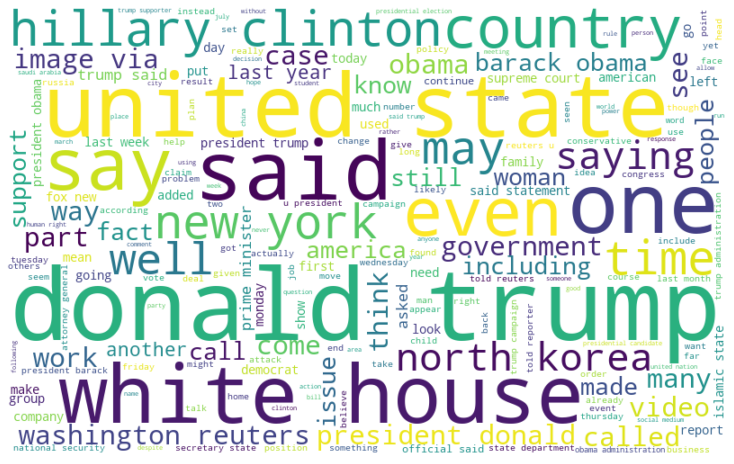

In [50]:
from wordcloud import WordCloud  # to generate word cloud of lemmatized text


fake_words = ' '.join([text for text in data['txt_lemmatized']])
wordcloud = WordCloud(width=800, height=500, background_color ='white',random_state=21, max_font_size=150).generate(fake_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Feature Extraction

In [51]:
#select x (independent v'ble) and y (dependent v'ble)

In [54]:
X=data['txt_lemmatized']
y=data['class']

In [55]:
y

0        1
1        0
2        0
3        0
4        1
        ..
44873    1
44874    0
44875    1
44876    1
44877    0
Name: class, Length: 44878, dtype: int64

In [56]:
y[20]

1

In [57]:
# importing required libraries

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools
from sklearn.metrics import recall_score,classification_report,make_scorer,f1_score
from sklearn.model_selection import cross_validate

In [59]:
# Split X for training and validation

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_train

38118    0
26624    0
31894    0
44543    0
32063    1
        ..
30403    1
21243    0
42613    1
43567    1
2732     0
Name: class, Length: 35902, dtype: int64

In [61]:
# Convert text to word frequency vectors

In [62]:
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 

count_train = count_vectorizer.fit_transform(X_train)


In [63]:
# Transform the test set 

count_test = count_vectorizer.transform(X_test)

In [64]:
print(count_vectorizer)

CountVectorizer(stop_words='english')


In [65]:
print(count_train)

  (0, 43398)	1
  (0, 110282)	2
  (0, 161443)	2
  (0, 1918)	2
  (0, 152486)	2
  (0, 138627)	2
  (0, 174205)	1
  (0, 127137)	1
  (0, 39813)	1
  (0, 55293)	1
  (0, 22621)	1
  (0, 6318)	1
  (0, 121255)	1
  (0, 57923)	1
  (0, 106471)	1
  (0, 57952)	1
  (0, 109342)	1
  (1, 123706)	5
  (1, 115854)	5
  (1, 45077)	1
  (1, 114246)	1
  (1, 102794)	6
  (1, 37997)	4
  (1, 168880)	3
  (1, 80143)	2
  :	:
  (35901, 60050)	1
  (35901, 79765)	1
  (35901, 19297)	1
  (35901, 58707)	1
  (35901, 124101)	1
  (35901, 11485)	1
  (35901, 40699)	1
  (35901, 41410)	1
  (35901, 65639)	1
  (35901, 126114)	1
  (35901, 166874)	1
  (35901, 63040)	2
  (35901, 155156)	1
  (35901, 129747)	1
  (35901, 37664)	2
  (35901, 41188)	1
  (35901, 22932)	1
  (35901, 106368)	1
  (35901, 80684)	5
  (35901, 132911)	1
  (35901, 105042)	1
  (35901, 181358)	1
  (35901, 145323)	1
  (35901, 157595)	1
  (35901, 42285)	1


In [66]:
print(count_train.shape)

(35902, 184478)


In [67]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_X_train = tfvect.fit_transform(X_train)# Fit and transform the training data 

In [68]:
# Transform the test set 

tfid_X_test = tfvect.transform(X_test)

In [69]:
print(tfid_X_train)

  (0, 109342)	0.14502374906668203
  (0, 57952)	0.2558146615386352
  (0, 106471)	0.0933104152654403
  (0, 57923)	0.14341270787819552
  (0, 121255)	0.4098776884097045
  (0, 6318)	0.09132546489039792
  (0, 22621)	0.103280605194897
  (0, 55293)	0.1579635247296688
  (0, 39813)	0.19523462112082035
  (0, 127137)	0.06579440423790604
  (0, 174204)	0.0945165382728787
  (0, 138627)	0.18559460183124665
  (0, 152485)	0.3219105804706492
  (0, 1918)	0.309953479785184
  (0, 161442)	0.5505332654771066
  (0, 110282)	0.20179821472686932
  (0, 43398)	0.2072735963880724
  (1, 181892)	0.09553825494067715
  (1, 126379)	0.10734114018756209
  (1, 103853)	0.07282930152496306
  (1, 174075)	0.05333427535570322
  (1, 78138)	0.06510468043534957
  (1, 169231)	0.042845296404214576
  (1, 96610)	0.04263423635888877
  (1, 170353)	0.1876685871848987
  :	:
  (35901, 127233)	0.057714223418866485
  (35901, 32467)	0.03475432402759257
  (35901, 111162)	0.02964250772651543
  (35901, 79570)	0.18443266609082043
  (35901, 89252)	

In [70]:
# Function to plot the confusion matrix 
# This function prints and plots the confusion matrix
# Normalization can be applied by setting 'normalize=True'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Training the model and Validation

# 1. Naive bayes
# Using Tf-Idf

In [71]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB() 
NB.fit(tfid_X_train,y_train) # Training the model using naive bayes

MultinomialNB()

In [72]:
y_pred = NB.predict(tfid_X_test) #
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.81%


In [73]:
print('Confusion Matrix : \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report : \n',classification_report(y_test, y_pred))

Confusion Matrix : 

 [[4359  289]
 [ 267 4061]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4648
           1       0.93      0.94      0.94      4328

    accuracy                           0.94      8976
   macro avg       0.94      0.94      0.94      8976
weighted avg       0.94      0.94      0.94      8976



Confusion matrix, without normalization


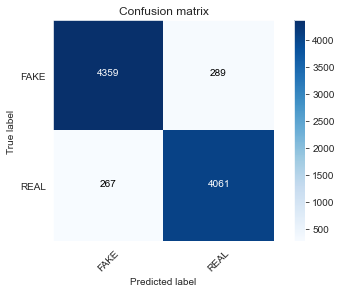

In [85]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

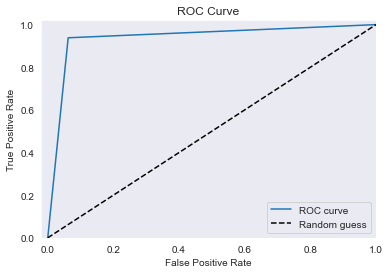

In [86]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

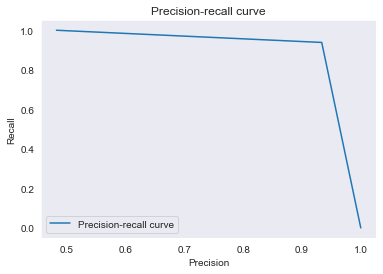

In [87]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [88]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred)# Actual output

0.9057164675592161

# Using Count_Vectorizer

In [148]:
NB_model = MultinomialNB() 
NB_model.fit(count_train,y_train) # Training the model using naive bayes

MultinomialNB()

In [149]:
y_pred = NB_model.predict(count_test) #
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 95.57%


In [150]:
print('Confusion Matrix : \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report : \n',classification_report(y_test, y_pred))

Confusion Matrix : 

 [[4424  224]
 [ 174 4154]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      4648
           1       0.95      0.96      0.95      4328

    accuracy                           0.96      8976
   macro avg       0.96      0.96      0.96      8976
weighted avg       0.96      0.96      0.96      8976



Confusion matrix, without normalization


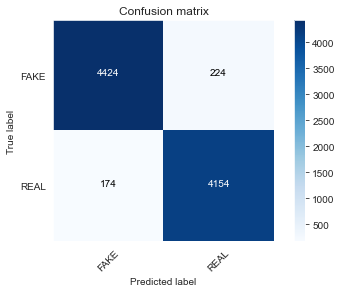

In [93]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

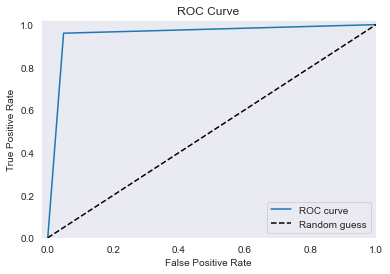

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

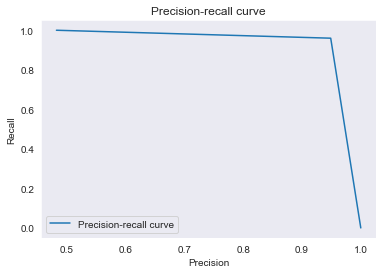

In [95]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [96]:
average_precision_score(y_test, y_pred)# Actual output

0.930073783916568

# 2. Passive aggressive classifier
# Using Tf-Idf

In [151]:
from sklearn.linear_model import PassiveAggressiveClassifier

PA_model = PassiveAggressiveClassifier()
PA_model.fit(tfid_X_train,y_train)

PassiveAggressiveClassifier()

In [153]:
y_pred = PA_model.predict(tfid_X_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.47%


In [154]:
print('Confusion Matrix : \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report : \n',classification_report(y_test, y_pred))

Confusion Matrix : 

 [[4623   25]
 [  23 4305]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4648
           1       0.99      0.99      0.99      4328

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



Confusion matrix, without normalization


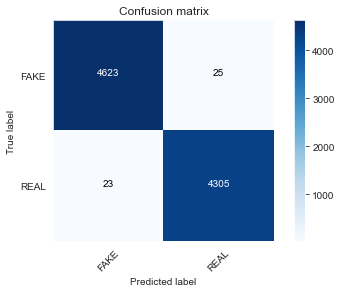

In [100]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

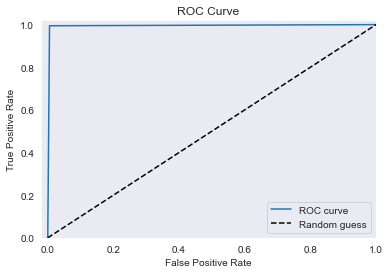

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

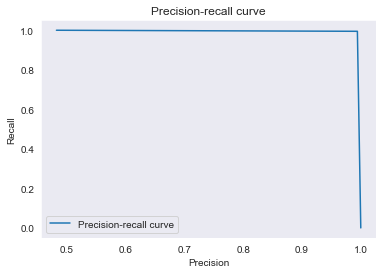

In [102]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [103]:
average_precision_score(y_test, y_pred)# Actual output

0.9915051662723424

# Using Count_Vectorizer

In [155]:
PA2 = PassiveAggressiveClassifier()
PA2.fit(count_train,y_train)

PassiveAggressiveClassifier()

In [156]:
y_pred = PA2.predict(count_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.38%


# 3. Logistic Regression
# Using Tf-Idf 

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
LR = LogisticRegression()
LR.fit(tfid_X_train,y_train)

LogisticRegression()

In [117]:
y_pred = LR.predict(tfid_X_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.53%


# Using Count_Vectorizer

In [157]:
LR_model = PassiveAggressiveClassifier()
LR_model.fit(count_train,y_train)

PassiveAggressiveClassifier()

In [158]:
y_pred = LR_model.predict(count_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.34%


Confusion Matrix : 

 [[4618   30]
 [  32 4296]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4648
           1       0.99      0.99      0.99      4328

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976

Confusion matrix, without normalization


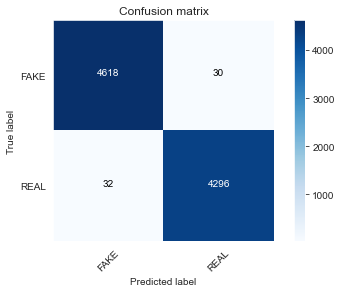

In [120]:
print('Confusion Matrix : \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report : \n',classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

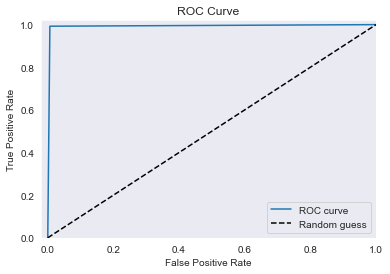

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

0.9892878083180746

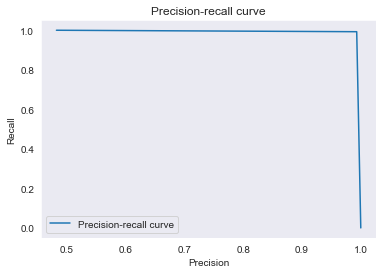

In [122]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")



average_precision_score(y_test, y_pred)# Actual output

# 4. Decision Tree Classifier

In [161]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()
DT_model.fit(tfid_X_train,y_train)

DecisionTreeClassifier()

In [162]:
y_pred = DT_model.predict(tfid_X_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.58%


Confusion Matrix : 

 [[4628   20]
 [  21 4307]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4648
           1       1.00      1.00      1.00      4328

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976

Confusion matrix, without normalization


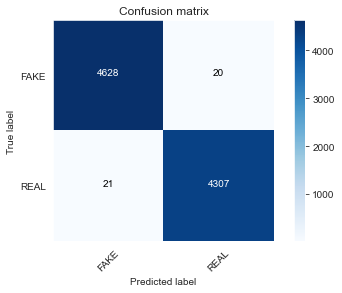

In [125]:
print('Confusion Matrix : \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report : \n',classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

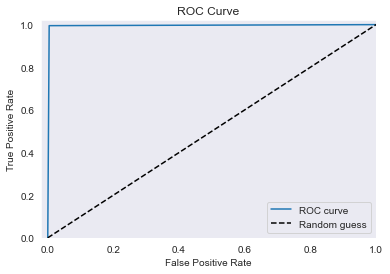

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

0.9928877336530071

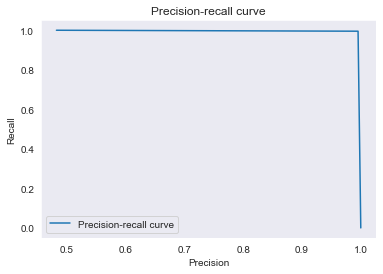

In [127]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")



average_precision_score(y_test, y_pred)# Actual output

# 5. KNeighborsClassifier

In [163]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(tfid_X_train,y_train)

KNeighborsClassifier()

In [164]:
y_pred = KNN_model.predict(tfid_X_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 86.83%


Confusion Matrix : 

 [[3703  945]
 [ 237 4091]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.80      0.86      4648
           1       0.81      0.95      0.87      4328

    accuracy                           0.87      8976
   macro avg       0.88      0.87      0.87      8976
weighted avg       0.88      0.87      0.87      8976

Confusion matrix, without normalization


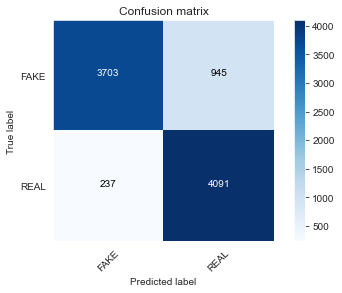

In [130]:
print('Confusion Matrix : \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report : \n',classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

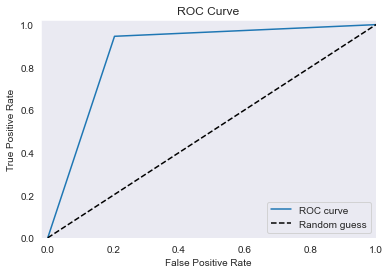

In [131]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

0.7942707111287682

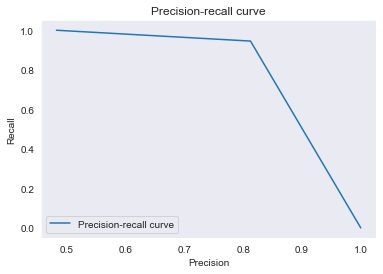

In [132]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")



average_precision_score(y_test, y_pred)# Actual output

# 6. SupportVector Machine

In [169]:
from sklearn.svm import SVC

SVM_model = SVC()
SVM_model.fit(tfid_X_train,y_train)

SVC()

In [170]:
y_pred = SVM_model.predict(tfid_X_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.32%


Confusion Matrix : 

 [[4618   30]
 [  31 4297]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4648
           1       0.99      0.99      0.99      4328

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976

Confusion matrix, without normalization


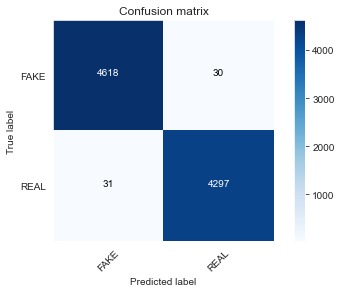

In [171]:
print('Confusion Matrix : \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report : \n',classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

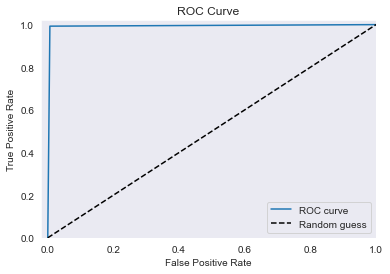

In [172]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

0.9894074426136913

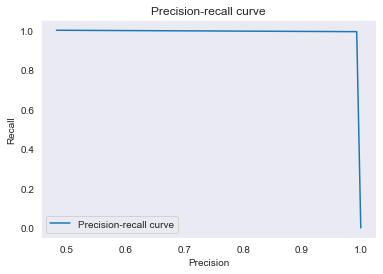

In [173]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")



average_precision_score(y_test, y_pred)# Actual output

# 7.RandomForestClassifier

In [165]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(tfid_X_train,y_train)

RandomForestClassifier()

In [166]:
y_pred = RF_model.predict(tfid_X_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 98.82%


Confusion Matrix : 

 [[4590   58]
 [  51 4277]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4648
           1       0.99      0.99      0.99      4328

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976

Confusion matrix, without normalization


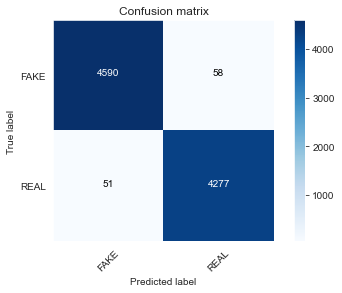

In [140]:
print('Confusion Matrix : \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report : \n',classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

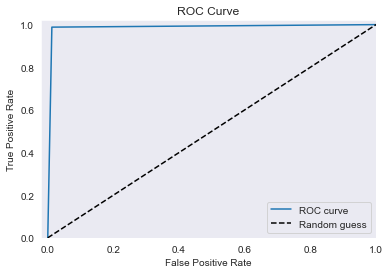

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

0.9806762750272943

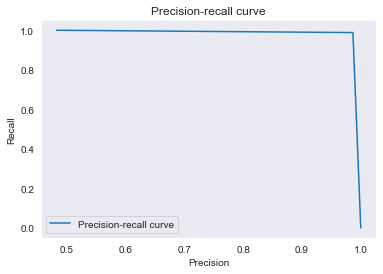

In [142]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")



average_precision_score(y_test, y_pred)# Actual output

# 8. GradientBoostingClassifier

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier()
GBC_model.fit(tfid_X_train,y_train)

GradientBoostingClassifier()

In [168]:
y_pred = GBC_model.predict(tfid_X_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 99.41%


Confusion Matrix : 

 [[4608   40]
 [  12 4316]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4648
           1       0.99      1.00      0.99      4328

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976

Confusion matrix, without normalization


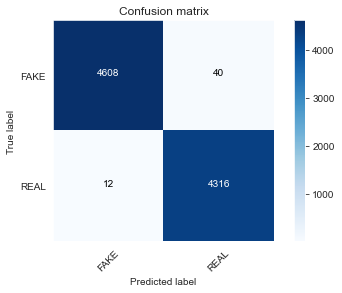

In [145]:
print('Confusion Matrix : \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report : \n',classification_report(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

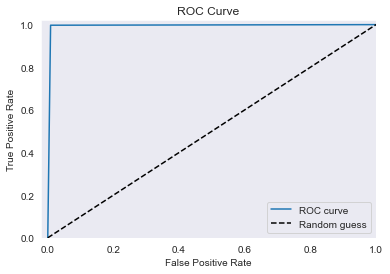

In [146]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

0.9894069791393029

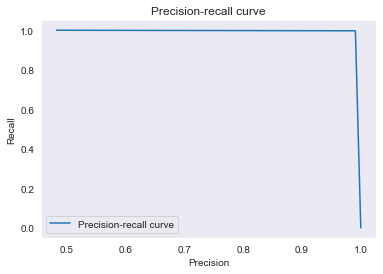

In [147]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")



average_precision_score(y_test, y_pred)# Actual output

# Comparing models

In [ ]:
# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}




def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    NB = cross_validate(NB_model, X, y, cv=folds, scoring=scoring)
    PA = cross_validate(PA_model, X, y, cv=folds, scoring=scoring)
    LR = cross_validate(LR_model, X, y, cv=folds, scoring=scoring)
    KNN = cross_validate(KNN_model, X, y, cv=folds, scoring=scoring)
    SVM = cross_validate(SVM_model, X, y, cv=folds, scoring=scoring)
    DT = cross_validate(DT_model, X, y, cv=folds, scoring=scoring)
    RF = cross_validate(RF_model, X, y, cv=folds, scoring=scoring)
    GBC = cross_validate(GBC_model, X, y, cv=folds, scoring=scoring)
    
    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Multinominal Naive Bayes':[NB['test_accuracy'].mean(),
                                                              NB['test_precision'].mean(),
                                                              NB['test_recall'].mean(),
                                                              NB['test_f1_score'].mean()],
                                        
                                        'Passive Aggressive Classifier':[PA['test_accuracy'].mean(),
                                                              PA['test_precision'].mean(),
                                                              PA['test_recall'].mean(),
                                                              PA['test_f1_score'].mean()],
                                       
                                       'Logistic Regression':[LR['test_accuracy'].mean(),
                                                               LR['test_precision'].mean(),
                                                               LR['test_recall'].mean(),
                                                               LR['test_f1_score'].mean()],
                                        
                                        'KNeighborsClassifier':[KNN['test_accuracy'].mean(),
                                                              KNN['test_precision'].mean(),
                                                              KNN['test_recall'].mean(),
                                                              KNN['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[SVM['test_accuracy'].mean(),
                                                                   SVM['test_precision'].mean(),
                                                                   SVM['test_recall'].mean(),
                                                                   SVM['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[DT['test_accuracy'].mean(),
                                                       DT['test_precision'].mean(),
                                                       DT['test_recall'].mean(),
                                                       DT['test_f1_score'].mean()],
                                       
                                      'Random Forest':[RF['test_accuracy'].mean(),
                                                       RF['test_precision'].mean(),
                                                       RF['test_recall'].mean(),
                                                       RF['test_f1_score'].mean()],
                                       
                                      'GradientBoostingClassifier':[GBC['test_accuracy'].mean(),
                                                              GBC['test_precision'].mean(),
                                                              GBC['test_recall'].mean(),
                                                              GBC['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(tfid_X_train,y_train, 5)


#  Verification / Testing

In [ ]:
def fake_news_detection(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = PA_model.predict(vectorized_input_data)
    print(prediction)

In [ ]:
fake_news_detection('')